In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

**Домашнее задание к лекции  «Корреляция и корреляционный анализ»** 

 Возьмите датасет Mortality and Water Hardness
 
https://www.kaggle.com/ukveteran/mortality-and-water-hardness

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

**Задание 1. 
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?**

* Построить точечный график
* Рассчитать коэффициенты корреляции Пирсона и Спирмена
* Построить модель линейной регрессии
* Рассчитать коэффициент детерминации
* Вывести график остатков


**Задание 2.
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?**

* Разделить данные на 2 группы
* Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности



In [2]:
water_hard = pd.read_csv('water.csv', index_col=0)

In [3]:
water_hard

,location,town,mortality,hardness
1,South,Bath,1247,105
2,North,Birkenhead,1668,17
3,South,Birmingham,1466,5
4,North,Blackburn,1800,14
5,North,Blackpool,1609,18
...,...,...,...,...
57,South,Walsall,1527,60
58,South,West Bromwich,1627,53
59,South,West Ham,1486,122
60,South,Wolverhampton,1485,81


In [4]:
water_hard.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 1 to 61
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   61 non-null     object
 1   town       61 non-null     object
 2   mortality  61 non-null     int64 
 3   hardness   61 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.4+ KB


In [5]:
water_hard.describe()

,mortality,hardness
count,61.000000,61.000000
mean,1524.147541,47.180328
std,187.668754,38.093966
min,1096.000000,5.000000
25%,1379.000000,14.000000
50%,1555.000000,39.000000
75%,1668.000000,75.000000
max,1987.000000,138.000000


In [6]:
def plot_coeff(dataframe):
    pearson = dataframe.corr()
    spearman = dataframe.corr(method='spearman')
    
    print(f'Коэффициент корреляции Пирсона:\n{pearson}')
    print(f'\nКоэффициент корреляции Спирмена:\n{spearman}')
    
    print('\nТочечный график:')
    dataframe.plot(x='hardness',
                   y='mortality',
                   kind='scatter')

Коэффициент корреляции Пирсона:
           mortality  hardness
mortality   1.000000 -0.654849
hardness   -0.654849  1.000000

Коэффициент корреляции Спирмена:
           mortality  hardness
mortality   1.000000 -0.631665
hardness   -0.631665  1.000000

Точечный график:


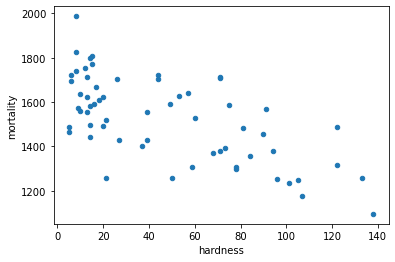

In [7]:
plot_coeff(water_hard)

[-2.71285413]
1639.5437332827382
0.48994274393411197


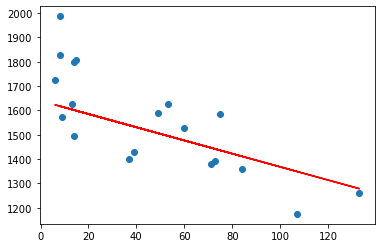

In [8]:
X = water_hard[['hardness']]
y = water_hard['mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=481516)

model = LinearRegression()
model.fit(X_train, y_train)

print(model.coef_)
print(model.intercept_)

y_pred = model.predict(X_test)

print(model.score(X_test, y_test))

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=481516)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
model.coef_

array([-2.71285413])

In [12]:
model.intercept_

1639.5437332827382

In [13]:
y_pred = model.predict(X_test)
y_pred

array([1617.84090026, 1533.74242228, 1476.77248558, 1436.07967366,
       1598.85092136, 1441.50538192, 1446.93109017, 1411.66398651,
       1506.613881  , 1617.84090026, 1539.16813054, 1604.27662961,
       1601.56377549, 1278.73413422, 1601.56377549, 1495.76246448,
       1615.12804613, 1623.26660851, 1349.26834156])

In [14]:
y_test

30    1828
18    1428
57    1527
50    1587
7     1807
11    1392
61    1378
10    1359
45    1591
46    1987
28    1402
55    1625
47    1495
35    1259
4     1800
58    1627
24    1574
37    1724
38    1175
Name: mortality, dtype: int64

In [15]:
model.score(X_test, y_test)

0.48994274393411197

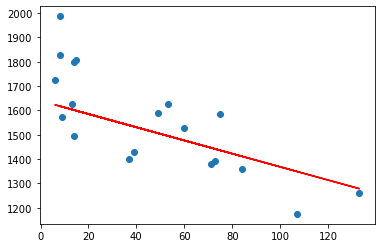

In [16]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')